# 🔄 Basic Agent Workflows with GitHub Models (Python)

## 📋 Workflow Orchestration Tutorial

This notebook introduces the powerful **Workflow Builder** capabilities of the Microsoft Agent Framework. Learn how to create sophisticated, multi-step agent workflows that can handle complex business processes and coordinate multiple AI operations seamlessly.

## 🎯 Learning Objectives

### 🏗️ **Workflow Architecture**
- **Workflow Builder**: Design and orchestrate complex multi-step processes
- **Event-Driven Execution**: Handle workflow events and state transitions
- **Visual Workflow Design**: Create and visualize workflow structures
- **GitHub Models Integration**: Leverage AI models within workflow contexts

### 🔄 **Process Orchestration**
- **Sequential Operations**: Chain multiple agent tasks in logical order
- **Conditional Logic**: Implement decision points and branching workflows
- **Error Handling**: Robust error recovery and workflow resilience
- **State Management**: Track and manage workflow execution state

### 📊 **Enterprise Workflow Patterns**
- **Business Process Automation**: Automate complex organizational workflows
- **Multi-Agent Coordination**: Coordinate multiple specialized agents
- **Scalable Execution**: Design workflows for enterprise-scale operations
- **Monitoring & Observability**: Track workflow performance and outcomes

## ⚙️ Prerequisites & Setup

### 📦 **Required Dependencies**

Install the Agent Framework with workflow capabilities:

```bash
pip install agent-framework-core -U
```

### 🔑 **GitHub Models Configuration**

**Environment Setup (.env file):**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

### 🏢 **Enterprise Use Cases**

**Business Process Examples:**
- **Customer Onboarding**: Multi-step verification and setup workflows
- **Content Pipeline**: Automated content creation, review, and publishing
- **Data Processing**: ETL workflows with AI-powered transformation
- **Quality Assurance**: Automated testing and validation processes

**Workflow Benefits:**
- 🎯 **Reliability**: Deterministic execution with error recovery
- 📈 **Scalability**: Handle high-volume process automation
- 🔍 **Observability**: Complete audit trails and monitoring
- 🔧 **Maintainability**: Visual design and modular components

## 🎨 Workflow Design Patterns

### Basic Workflow Structure
```mermaid
graph TD
    A[Start] --> B[Agent Task 1]
    B --> C{Decision Point}
    C -->|Success| D[Agent Task 2]
    C -->|Failure| E[Error Handler]
    D --> F[End]
    E --> F
```

**Key Components:**
- **WorkflowBuilder**: Main orchestration engine
- **WorkflowEvent**: Event handling and communication
- **WorkflowViz**: Visual workflow representation and debugging

Let's build your first intelligent workflow! 🚀

In [1]:
! sudo apt update 
! sudo apt install graphviz -y

Hit:1 http://deb.debian.org/debian bookworm InRelease
Hit:2 http://deb.debian.org/debian bookworm-updates InRelease                  
Hit:3 http://deb.debian.org/debian-security bookworm-security InRelease        
Hit:4 https://dl.yarnpkg.com/debian stable InRelease                           
Hit:5 https://packages.microsoft.com/repos/azure-cli bookworm InRelease        
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
All packages are up to date.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-7+deb12u1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [2]:
! pip install agent-framework-core -U
! pip install agent-framework[viz] -U
! pip install graphviz -U

In [3]:
# 🔄 Import Workflow and Agent Framework Components
# Core components for building sophisticated agent workflows

from agent_framework.openai import OpenAIChatClient    # 🤖 GitHub Models client integration
from agent_framework import WorkflowBuilder, WorkflowEvent, WorkflowViz  # 🏗️ Workflow orchestration tools

In [4]:
# 📦 Import Environment and System Utilities
# Essential libraries for configuration and environment management

import os                      # 🔧 Environment variable access
from dotenv import load_dotenv # 📁 Secure configuration loading

In [5]:
# 🔧 Initialize Environment Configuration
# Load GitHub Models API credentials from .env file
load_dotenv()

True

In [6]:
# 🔗 Initialize GitHub Models Chat Client for Workflow Operations
# Create the AI client that will power agents within our workflow
chat_client = OpenAIChatClient(
    base_url=os.environ.get("GITHUB_ENDPOINT"),    # 🌐 GitHub Models API endpoint
    api_key=os.environ.get("GITHUB_TOKEN"),        # 🔑 Authentication token
    model_id=os.environ.get("GITHUB_MODEL_ID")  # 🎯 Selected AI model
)

In [7]:
REVIEWER_NAME = "Concierge"
REVIEWER_INSTRUCTIONS = """
    You are an are hotel concierge who has opinions about providing the most local and authentic experiences for travelers.
    The goal is to determine if the front desk travel agent has recommended the best non-touristy experience for a traveler.
    If so, state that it is approved.
    If not, provide insight on how to refine the recommendation without using a specific example. 
    """

In [8]:
FRONTDESK_NAME = "FrontDesk"
FRONTDESK_INSTRUCTIONS = """
    You are a Front Desk Travel Agent with ten years of experience and are known for brevity as you deal with many customers.
    The goal is to provide the best activities and locations for a traveler to visit.
    Only provide a single recommendation per response.
    You're laser focused on the goal at hand.
    Don't waste time with chit chat.
    Consider suggestions when refining an idea.
    """

In [9]:
reviewer_agent   = chat_client.create_agent(
        instructions=(
           REVIEWER_INSTRUCTIONS
        ),
        name=REVIEWER_NAME,
    )

front_desk_agent = chat_client.create_agent(
        instructions=(
            FRONTDESK_INSTRUCTIONS
        ),
        name=FRONTDESK_NAME,
    )

In [10]:
workflow = WorkflowBuilder().set_start_executor(front_desk_agent).add_edge(front_desk_agent, reviewer_agent).build()

In [11]:

print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  FrontDesk["FrontDesk (Start)"];
  Concierge["Concierge"];
  FrontDesk --> Concierge;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "FrontDesk" [fillcolor=lightgreen, label="FrontDesk\n(Start)"];
  "Concierge" [label="Concierge"];
  "FrontDesk" -> "Concierge";
}
SVG file saved to: /tmp/tmpvs3tp4cf.svg


In [12]:
class DatabaseEvent(WorkflowEvent): ...

Attempting to display SVG file at: /tmp/tmpvs3tp4cf.svg


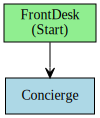

In [13]:
# Display the exported workflow SVG inline in the notebook

from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")


In [14]:
result =''
async for event in workflow.run_stream('I would like to go to Paris.'):
    if isinstance(event, DatabaseEvent):
        print(f"{event}")
    if isinstance(event, WorkflowEvent):
        result += str(event.data)
        # print(f"Workflow output: {event.data}")

In [15]:
result.replace("None", "")

'Visit the Louvre Museum for an unparalleled art experience.While the Louvre is an iconic destination, it tends to attract large crowds and may not offer the authentic local experience you’re looking for. Consider refining the recommendation by suggesting smaller, lesser-known art galleries or local artist studios where you can engage more personally with the culture and creativity of Paris. Look for places that host workshops or previews of local art that are off the beaten path.While the Louvre is an iconic destination, it tends to attract large crowds and may not offer the authentic local experience you’re looking for. Consider refining the recommendation by suggesting smaller, lesser-known art galleries or local artist studios where you can engage more personally with the culture and creativity of Paris. Look for places that host workshops or previews of local art that are off the beaten path.'